In [1]:
#!/usr/bin/python
# updated DBR 8/2022 #

%matplotlib inline

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import resource; resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots
sns.set_style("ticks")


In [2]:
#use estimates from fig1
mml=[
[-0.017458995263465633,
  -0.027963188246753257,
  -0.006954802280178007,
  2.133828689306623,
  1.5194512978304815,
  2.748206080782765],
 [-0.0014492528259140106,
  -0.010711731536401215,
  0.007813225884573194,
  4.232748826106653,
  3.523891117933356,
  4.94160653427995],
 [-0.0012991836822083044,
  -0.018787223299853967,
  0.016188855935437355,
  5.179008078698575,
  3.8345797218140714,
  6.523436435583079],
 [0.0026998964400987177,
  -0.007662969749109138,
  0.013062762629306574,
  7.653275939622402,
  7.017522533953551,
  8.289029345291253]]

In [3]:
#use Q4PCR rates and IPDA levels?

mean_thI = mml[0][0]
mean_thD = mml[1][0]

std_thI = (mml[0][0]-mml[0][1])/1.96
std_thD = (mml[1][0]-mml[1][1])/1.96

mean_lI0 = mml[2][3] #IPDA I0
mean_lD0 = mml[3][3] #IPDA D0

std_lI0 = (mml[2][3]-mml[2][4])/1.96
std_lD0 = (mml[3][3]-mml[3][4])/1.96


In [29]:
np.log(2)/mean_thD

-478.2789918817603

In [4]:
#the fraction of intacts:defectives, error propoagate for std
mean_fID = np.exp(mean_lI0)/np.exp(mean_lD0)
std_fID = mean_fID*np.sqrt((std_lI0/mean_lI0)**2+(std_lD0/mean_lD0)**2)

std_fID

0.011712342203008614

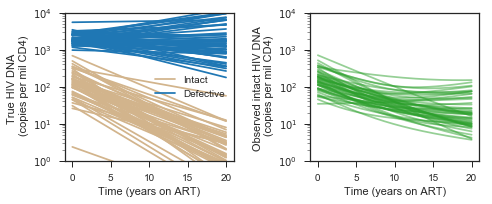

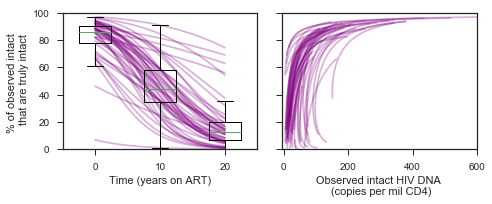

In [18]:
#assume distributions of intact/total decay rates

f=0.01 #what fraction of defectives will be called intact

yF=20
Ntpts=1000
t=np.linspace(0,yF*12,Ntpts) #time in months
ty=t/12

dt=t[1]

fig1,axarr1=plt.subplots(1,2,figsize=(7,3))
fig2,axarr2=plt.subplots(1,2,figsize=(7,3),sharey=True)

truerat_l=[[],[],[]]
for i in range(50):
    
    th_int=np.random.normal(mean_thI,std_thI) #true decay rate
    th_def=np.random.normal(mean_thD,std_thD) #true decay rate

    L_int0=np.exp(np.random.normal(mean_lI0,std_lI0)) #observed
    L_def0=np.exp(np.random.normal(mean_lD0,std_lD0)) #observed
            
    #deal with correlations instead of just simulating Lint and Ldef separate draws
    #fint = np.random.normal(mean_fID,std_fID)
    #if fint<0:
    #    fint=mean_fID
    #L_int0=L_def0*fint
    
    L_int0 = L_int0 - f * L_def0 #subtract off error rate at the beginning

    #simple exponential decay models
    L_int=L_int0*np.exp(th_int*t)
    #obs_L_int=L_int0*np.exp(th_int*t)
    L_def=L_def0*np.exp(th_def*t)
    #L_tot=L_def+L_int

    #add noise?

    #now introduce error rate and plot "observed intact"
    #L_int=obs_L_int - f * L_def
    #L_int[L_int<1]=1.1
    
    obs_L_int=L_int+f*L_def
    truerat=L_int/obs_L_int*100
    
    #for boxes
    truerat_l[0].append(truerat[50])
    truerat_l[1].append(truerat[500])
    truerat_l[2].append(truerat[950])
    
    XX=1
    axarr1[0].plot(ty[::XX],L_int[::XX],color='tan')#,label='Intact')
    axarr1[0].semilogy(ty[::XX],L_def[::XX],color='tab:blue')#,label='Defective')
    axarr1[1].semilogy(ty[::XX],obs_L_int[::XX],color='tab:green',alpha=0.5)

    axarr2[0].plot(ty[::XX],truerat[::XX],color='purple',alpha=0.3)
    axarr2[1].plot(obs_L_int[::XX],truerat[::XX],color='purple',alpha=0.3)
    
#plot boxs
axarr2[0].boxplot(truerat_l,positions=[0,10,20],widths=5)

axarr1[0].set_xlabel('Time (years on ART)')
axarr1[0].set_ylabel('True HIV DNA \n (copies per mil CD4)')
axarr1[0].legend(['Intact','Defective'])
axarr1[0].set_ylim([1,1e4])

axarr1[1].set_xlabel('Time (years on ART)')
axarr1[1].set_ylabel('Observed intact HIV DNA \n (copies per mil CD4)')
axarr1[1].set_ylim([1,1e4])
#plt.xticks(np.arange(0,yF,2))
#axarr1[1].set_title('f = '+str(error_rate))

axarr2[0].set_xlabel('Time (years on ART)')
axarr2[0].set_ylabel('% of observed intact \n that are truly intact') #Percentage of proviruses \n identified as intact \n that are truly intact

axarr2[0].set_ylim([0,100])
axarr2[0].set_xlim([-5,25])

axarr2[1].set_xlabel('Observed intact HIV DNA \n (copies per mil CD4)')
axarr2[1].set_xlim([-5,600])

fig1.tight_layout()
fig1.savefig('figures/sim1.pdf',dpi=600)

fig2.tight_layout()
fig2.savefig('figures/sim2.pdf',dpi=600)


In [ ]:
np.log(2)/-th_def

In [ ]:
np.log(2)/-th_int

In [ ]:
std_thD